#Trabajo 1: Análisis de Crédito al Sector Privado y Exportaciones en Piura

Curso: Introducción a Ciencia de Datos y Machine Learning con Python

¿En qué medida el crédito directo del sistema financiero al
sector privado en Piura impacta en el nivel de exportaciones del
departamento?

Objetivo

Evaluar la relación entre el crédito directo otorgado por el sistema financiero al sector privado en Piura y el nivel de exportaciones del departamento.


Grupo: N° 7

Integrantes:

Carlos Fabrizzio Cruz Valencia

Nicolas Alexis Rodriguez Farro

Cristina Sánchez Miranda

Angelica Milagros Velasquez Cabrera

#**Descarga datos del BCRP**

Este apartado se encarga de conectar con la API del Banco Central de Reserva del Perú (BCRP), descargar las series estadísticas seleccionadas (créditos, exportaciones, tipo de cambio, etc.) y transformarlas a un formato manejable en Python (JSON).

Objetivo

Obtener datos económicos directamente desde la fuente oficial (BCRP) en el rango de tiempo definido (2005–2022), para posteriormente calcular indicadores estadisticos como correlaciones, y finalmente visualizar los resultados con gráficos que permitan identificar tendencias y patrones para su interpretación económica.

Procedimiento

Se definen los parámetros de la consulta (códigos de las series, formato y periodo de tiempo) y se construye la URL de la API del BCRP.

Se realiza la solicitud a la API con requests.get() para obtener los datos de las series económicas.

Se convierte la respuesta en un diccionario JSON y se hace una inspección básica para verificar que los datos llegaron correctamente.

#**Marco Teórico**

*   El crédito al sector privado es importante porque permite a las empresas financiar su producción, invertir en maquinaria y cubrir sus necesidades de capital de trabajo. La teoría económica indica que un mayor acceso al crédito impulsa la producción y, en el caso de Piura, debería apoyar el crecimiento de las exportaciones agroindustriales y pesqueras.

*   Las exportaciones son relevantes porque generan divisas y pueden dinamizar el crecimiento económico. Según la teoría del crecimiento liderado por las exportaciones, un aumento de las ventas externas mejora la productividad y el empleo. Sin embargo, también se reconoce que las exportaciones son más inestables, ya que dependen de factores externos como precios internacionales, demanda global o el clima.

*   El tipo de cambio afecta directamente tanto al comercio como al crédito. Una depreciación del sol abarata las exportaciones y encarece las importaciones, lo que beneficia al sector exportador. Pero, al mismo tiempo, hace más costoso el pago de créditos en dólares, lo que puede reducir su demanda. Por eso, su comportamiento es clave para entender la relación entre estas variables.

*   A nivel nacional, el crédito y las exportaciones se mueven en escalas más grandes y suelen ser más estables en el agregado. A nivel regional, como en Piura, estas variables son más sensibles a factores locales y sectoriales. La teoría sugiere que el crédito debería crecer de manera sostenida, mientras que las exportaciones presenten mayor volatilidad por su dependencia de condiciones externas.





In [1]:
#==============
# IMPORTAMOS LIBRERÍAS
#==============

import requests #Para realizar solicitudes HTTP a la API del BCRP
import pandas as pd #Para manejar y analizar datos en las tablas
import numpy as np #Para operaciones numéricas
import matplotlib.pyplot as plt #Para crear gráficos básicos

# Define los parámetros de tu consulta
codigos_bcrp = 'RD13619DM-RD13617DM-RD13618DM-RD38104BM-PN01210PM-RD38111BM-RD13637DM'#Credito directo total al sector privado-Piura ,en moenda nacional , moneda extranjera , exportaciones fob - tipo de cambio promedio, EXPORTACIONES TOTALES, CREDITOS TOTALES )
formato = 'json' #json
periodo_inicial = '2005-01' #Fecha inicial "AAAA-MM"
periodo_final = '2022-12' #Fecha final "AAAA-MM"

# Construcción de la URL
url_bcrp = f"https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codigos_bcrp}/{formato}/{periodo_inicial}/{periodo_final}"

# Llamada a la API y conversión a JSON
response_bcrp = requests.get(url_bcrp) #Solicitud a la API
data_bcrp = response_bcrp.json() # el metodo .json() convierte la respuesta en un diccionario JSON
# Inspección básica
print(data_bcrp.keys())          # Ver claves del JSON
print(data_bcrp["periods"][:5])  # Ver los primeros 5 periodos en bruto


dict_keys(['config', 'periods'])
[{'name': 'Ene.2005', 'values': ['3.26821428571429', '539.0385159', '391.50363285', '930.542148750001', '38568.6866271801', '63.6991736100002', '1264.05401593965']}, {'name': 'Feb.2005', 'values': ['3.258825', '544.47567691', '387.70890586', '932.18458277', '38631.62569296', '68.8704715400003', '1136.996685324']}, {'name': 'Mar.2005', 'values': ['3.25930952380952', '566.4314776', '404.78091478', '971.21239238', '39155.82953142', '61.3973847799999', '1347.4939257933']}, {'name': 'Abr.2005', 'values': ['3.25795', '580.93450842', '407.28891862', '988.22342704', '40102.78798217', '54.70853942', '1257.79470001206']}, {'name': 'May.2005', 'values': ['3.25488095238095', '577.61788732', '420.66992199', '998.28780931', '41154.899206', '75.57468719', '1354.77868169588']}]


#**Estructurar series del BCRP (Piura) en un DataFrame**

Se procesan los datos descargados de la API del BCRP para organizar las series económicas de exportaciones y crédito directo al sector privado tanto a nivel nacional como en Piura. La información se estructura en un DataFrame con índice temporal, lo que permite un análisis comparativo ordenado entre el ámbito regional y nacional.

Objetivo

Transformar la información cruda obtenida de la API en un DataFrame limpio y estructurado que contenga todas las variables relevantes (crédito, exportaciones y tipo de cambio), con fechas en formato datetime e índice temporal.

Procedimiento

Mapear los nombres de las series para identificar cada variable.

Recorrer los periodos, convertir valores numéricos y reemplazar faltantes.

Construir el DataFrame y organizarlo con la fecha como índice temporal.

In [2]:
#========================================
# CREAR MAPA DE SERIES CON NOMBRES EXACTOS
#=======================================
mapa_series = {serie["name"]: idx for idx, serie in enumerate(data_bcrp["config"]["series"])} #Relaciona cada serie con su posición
print("Mapa de series detectado:", mapa_series) ##Muestra las claves (nombres) y posiciones (índices) de las series

# Inicializar listas para almacenar valores
fechas = [] #Períodos en formato "AAAA-MM"
tipo_cambio = [] #Tipo de cambio promedio
# Piura
credito_total_piura = [] #Crédito directo total al sector privado (Piura)
credito_soles = [] #Crédito en moneda nacional (Piura)
credito_dolares = [] #Crédito en moneda extranjera (Piura)
exportaciones = [] #Exportaciones FOB (millones US$ de Piura)
# Nacional
credito_total_nacional = [] #Crédito directo total nacional
exportaciones_nacional = [] #Exportaciones FOB totales del país

#=============================
# RPROCESAMIENTO DRECTO DE LOS DATOS
#============================
for periodo in data_bcrp["periods"]: #Recorremos cada perido del JSON
    fechas.append(periodo["name"]) #Guardamos fecha de cada período
    valores = periodo["values"] #Lista de valores correspondientes a todas las series en ese período

    #Para cada serie se busca su valor dentro de JSON usando mapa de series, se convierte a número si existe y, si no está disponible, NaN
    tipo_cambio.append(
        float(valores[mapa_series["Tipo de cambio - promedio del periodo (S/ por US$) - Bancario - Promedio"]])
        if valores[mapa_series["Tipo de cambio - promedio del periodo (S/ por US$) - Bancario - Promedio"]] != "n.d." else np.nan
    )
    # Piura
    credito_total_piura.append(
        float(valores[mapa_series["Crédito directo del sistema financiero al sector privado por departamentos - fin de periodo (millones S/) - Piura (total)"]])
        if valores[mapa_series["Crédito directo del sistema financiero al sector privado por departamentos - fin de periodo (millones S/) - Piura (total)"]] != "n.d." else np.nan
    )
    credito_soles.append(
        float(valores[mapa_series["Crédito directo del sistema financiero al sector privado por departamentos - fin de periodo (millones S/) - Piura (moneda nacional)"]])
        if valores[mapa_series["Crédito directo del sistema financiero al sector privado por departamentos - fin de periodo (millones S/) - Piura (moneda nacional)"]] != "n.d." else np.nan
    )
    credito_dolares.append(
        float(valores[mapa_series["Crédito directo del sistema financiero al sector privado por departamentos - fin de periodo (millones S/) - Piura (moneda extranjera)"]])
        if valores[mapa_series["Crédito directo del sistema financiero al sector privado por departamentos - fin de periodo (millones S/) - Piura (moneda extranjera)"]] != "n.d." else np.nan
    )
    exportaciones.append(
        float(valores[mapa_series["Exportaciones por Departamento (Valores FOB en millones US$) - Piura"]])
        if valores[mapa_series["Exportaciones por Departamento (Valores FOB en millones US$) - Piura"]] != "n.d." else np.nan
    )
    # Nacional
    credito_total_nacional.append(
        float(valores[mapa_series["Crédito directo del sistema financiero al sector privado por departamentos - fin de periodo (millones S/) - Total (total)"]])
        if valores[mapa_series["Crédito directo del sistema financiero al sector privado por departamentos - fin de periodo (millones S/) - Total (total)"]] != "n.d." else np.nan
    )
    exportaciones_nacional.append(
        float(valores[mapa_series["Exportaciones por Departamento (Valores FOB en millones US$) - Total"]])
        if valores[mapa_series["Exportaciones por Departamento (Valores FOB en millones US$) - Total"]] != "n.d." else np.nan
    )


#=====================
# Construcción del DataFrame
#=====================
df = pd.DataFrame({
    "fecha": fechas,
    "tipo_cambio": tipo_cambio,
    "credito_total_piura": credito_total_piura,
    "credito_soles_piura": credito_soles,
    "credito_dolares_piura": credito_dolares,
    "exportaciones_piura": exportaciones,
    "credito_total_nacional": credito_total_nacional,
    "exportaciones_nacional": exportaciones_nacional
})

# Replace Spanish month abbreviations with English equivalents
month_replacements = {
    'Ene.': 'Jan.',
    'Abr.': 'Apr.',
    'Ago.': 'Aug.',
    'Dic.': 'Dec.'
}

df['fecha'] = df['fecha'].replace(month_replacements, regex=True)

# Convertir la columna fecha a datetime
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

# Eliminar fechas nulas y duplicadas
df = df.dropna(subset=["fecha"])
df = df.drop_duplicates(subset=["fecha"])

# Usar fecha como índice ordenado
df = df.set_index("fecha").sort_index()

print(df.head())
print(df.info())

Mapa de series detectado: {'Tipo de cambio - promedio del periodo (S/ por US$) - Bancario - Promedio': 0, 'Crédito directo del sistema financiero al sector privado por departamentos - fin de periodo (millones S/) - Piura (moneda nacional)': 1, 'Crédito directo del sistema financiero al sector privado por departamentos - fin de periodo (millones S/) - Piura (moneda extranjera)': 2, 'Crédito directo del sistema financiero al sector privado por departamentos - fin de periodo (millones S/) - Piura (total)': 3, 'Crédito directo del sistema financiero al sector privado por departamentos - fin de periodo (millones S/) - Total (total)': 4, 'Exportaciones por Departamento (Valores FOB en millones US$) - Piura': 5, 'Exportaciones por Departamento (Valores FOB en millones US$) - Total': 6}
            tipo_cambio  credito_total_piura  credito_soles_piura  \
fecha                                                               
2005-01-01     3.268214           930.542149           539.038516   
200

/tmp/ipython-input-2146957406.py:84: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")


#**Preparación y limpieza de datos macroeconómicos**

Estandarizar y completar el dataframe mensual: poner todas las series en el mismo formato/fecha, garantizar que existan todos los meses del 2005-01 al 2022-12 y rellenar los valores faltantes para poder analizarlas sin cortes.

Objetivo

Obtener un dataset limpio y alineado (216 meses), con exportaciones expresadas en soles, un índice temporal homogéneo (primer día de cada mes) y sin valores faltantes que rompan gráficos o cálculos.

Procedimiento

Se convirtieron las exportaciones de dólares a soles multiplicando por el tipo de cambio.

Se normalizó el índice temporal para que cada registro representara el primer día de cada mes.

Se creó un calendario mensual completo de 2005 a 2022 y se reindexaron los dataframes para que coincidieran con esas fechas.

Se rellenaron los valores faltantes con el método forward fill y se restauró la columna de fecha para dejar el dataset listo

In [3]:
#=====================
# Limpieza de datos
#=====================
df_macro_limpio = df.copy()

# Convertir exportaciones a millones de soles
df_macro_limpio["exportaciones_nacional"] = (
    df_macro_limpio["exportaciones_nacional"] * df_macro_limpio["tipo_cambio"]
)
df_macro_limpio["exportaciones_piura"] = (
    df_macro_limpio["exportaciones_piura"] * df_macro_limpio["tipo_cambio"]
)

# Normalizar índice mensual (primer día de cada mes)
df_macro_limpio.index = df_macro_limpio.index.to_period("M").to_timestamp()

# Crear calendario mensual completo
fechas_completas = pd.date_range(start="2005-01-01", end="2022-12-01", freq="MS")

# Reindexar ambos DataFrames para que coincidan
df = df.reindex(fechas_completas)
df_macro_limpio = df_macro_limpio.reindex(fechas_completas)

# Rellenar NaN con forward fill
cols_ffill = [
    "credito_total_piura", "credito_soles_piura", "credito_dolares_piura",
    "exportaciones_piura", "credito_total_nacional",
    "exportaciones_nacional", "tipo_cambio"
]
for col in cols_ffill:
    df_macro_limpio[col] = df_macro_limpio[col].fillna(method="ffill")
    df[col] = df[col].fillna(method="ffill")

# Restaurar la columna fecha
df = df.reset_index().rename(columns={"index": "fecha"})
df_macro_limpio = df_macro_limpio.reset_index().rename(columns={"index": "fecha"})

# Mostrar resultados
print("\nDataFrame con calendario completo y datos limpios:")
display(df_macro_limpio.tail(15))

/tmp/ipython-input-1017578735.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_macro_limpio[col] = df_macro_limpio[col].fillna(method="ffill")
/tmp/ipython-input-1017578735.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method="ffill")



DataFrame con calendario completo y datos limpios:


,fecha,tipo_cambio,credito_total_piura,credito_soles_piura,credito_dolares_piura,exportaciones_piura,credito_total_nacional,exportaciones_nacional
201,2021-10-01,4.015050,8862.273007,7804.105068,1058.167939,1188.662547,388290.516156,23223.178516
202,2021-11-01,4.019595,8974.461114,7892.371291,1082.089823,1651.414724,392767.741678,25068.434002
203,2021-12-01,4.036977,8996.773157,7923.768722,1073.004435,1641.080824,395349.617172,26480.191659
204,2022-01-01,3.889286,8996.566895,7914.271698,1082.295198,1207.184460,391747.874806,21405.773658
205,2022-02-01,3.790800,9057.637948,7974.142565,1083.495383,905.046798,391816.204909,21723.850921
206,2022-03-01,3.738783,9041.937606,8019.479935,1022.457671,921.176607,395441.691158,21060.842455
207,2022-04-01,3.739737,9136.565092,8076.751821,1059.813271,652.290047,400374.560653,19638.119391
208,2022-05-01,3.757545,9173.874218,8103.732070,1070.142147,665.360305,400330.772672,17961.529701
209,2022-06-01,3.747143,9203.999112,8116.638653,1087.360459,1077.797091,406853.186024,21659.996983
210,2022-07-01,3.902184,9227.535196,8074.038349,1153.496847,810.989402,412496.854700,19045.695314


In [4]:
#===================
# EXPORTACION DE DATOS LIMPIOS A CSV
#===================
df_macro_limpio.to_csv("datos_limpios.csv", index=False) #Convierte Dataframe a CSV



#**Exploración Dataframe limpio**

Se revisa el DataFrame ya limpio para conocer su tamaño (número de filas y columnas) y obtener un resumen estadístico de las principales variables numéricas, lo que permite verificar que el proceso de limpieza se realizó correctamente.

Objetivo

Evaluar las dimensiones del DataFrame y generar un cuadro con estadísticas descriptivas (media, desviación estándar, mínimos, máximos y percentiles), con el fin de validar la calidad de los datos antes de continuar con el análisis.

Procedimiento

Se revisó la estructura del DataFrame mostrando el número de filas y columnas.

Se organizó la salida para que los resultados se vean más claros.

Se generó un resumen estadístico de las variables numéricas para entender su comportamiento general

In [5]:
# Dimensiones del DataFrame (filas, columnas)
print("Dimensiones del DataFrame:", df.shape) #Muestra número de filas y columnas
print("\n") #Mejorar visualización
# Resumen de estadísticas descriptivas
print("Resumen Numérico:") #Inicio de resumen estadístico
display(df.describe().drop(columns=['fecha'], errors='ignore')) #Genera cuadro

Dimensiones del DataFrame: (216, 8)


Resumen Numérico:


,tipo_cambio,credito_total_piura,credito_soles_piura,credito_dolares_piura,exportaciones_piura,credito_total_nacional,exportaciones_nacional
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,3.169210,4923.506768,4040.640380,879.968829,186.313470,201851.757737,3358.496619
min,2.551909,930.542149,539.038516,377.096487,39.017739,38568.686627,1136.996685
25%,2.838974,2630.853843,1962.010508,670.589693,129.340175,98965.381998,2583.001614
50%,3.235256,5071.988658,4045.391440,995.944617,181.342293,194493.795067,3337.464437
75%,3.346695,6923.053403,5802.849556,1083.606828,235.016368,291003.284334,4071.496096
max,4.107477,9459.974881,8217.568247,1257.251058,581.504837,412496.854700,6559.410636
std,0.356662,2553.967218,2327.467375,259.858030,79.761711,114996.623832,1112.172854


#**Carga y organización del Índice Costero El Niño (ICEN)**

Este apartado se encarga de obtener los datos del ICEN desde una fuente externa, limpiarlos para eliminar información innecesaria y organizarlos en un formato tabular con fechas y valores listos para el análisis.

Objetivo

Tener la serie del ICEN lista en un formato ordenado y compatible con el resto de las variables económicas, de manera que se pueda integrar fácilmente al análisis y usar en gráficos o cálculos posteriores

Procedimiento

Descarga de datos: se obtiene el archivo del ICEN directamente desde la web del IGP.

Limpieza básica: se eliminan las líneas que no contienen información numérica y se conservan solo las filas con año, mes y valor.

Organización en tabla: se convierten los registros en un DataFrame, colocando la fecha en formato año-mes y los valores del ICEN como números.

Preparación final: se ordena la tabla por fechas y se verifican los primeros resultados para confirmar que la serie está lista para usarse.

In [6]:


# URL del archivo ICEN
url = "http://met.igp.gob.pe/datos/ICEN.txt"
response = requests.get(url)
data_text = response.text

# Separar el texto en líneas y eliminar encabezados innecesarios (que comienzan con "%")
lineas = data_text.strip().split('\n')
indice_inicio = 0
for i, linea in enumerate(lineas):
    if not linea.startswith('%'):
        indice_inicio = i
        break

# Extraer solo las líneas de datos
lineas_datos = lineas[indice_inicio:]

# Crear diccionario procesado (similar al formato del BCRP)
datos_procesados = {
    "config": {
        "titulo": "Índice Costero El Niño (ICEN)",
        "series": [
            {"nombre": "ICEN", "unidad": "", "frecuencia": "Mensual"}
        ]
    },
    "periodos": []
}

# Procesar cada línea de datos
for linea in lineas_datos:
    partes = linea.split()
    if len(partes) >= 3:  # Asegurar que existan año, mes y valor ICEN
        anio = partes[0]
        mes = partes[1]
        valor_icen = partes[2]

        # Formato YYYY-MM
        periodo = f"{anio}-{int(mes):02d}"

        datos_procesados["periodos"].append({
            "nombre": periodo,
            "valores": [valor_icen]  # Se guarda en lista por compatibilidad con formato BCRP
        })

# Convertir diccionario a DataFrame
fechas_icen = []
valores_icen = []

for periodo in datos_procesados["periodos"]:
    fechas_icen.append(periodo["nombre"])
    valores_icen.append(
        float(periodo["valores"][0]) if periodo["valores"][0] != "n.d." else np.nan
    )

df_icen = pd.DataFrame({
    "fecha": fechas_icen,
    "ICEN": valores_icen
})

# Formato fecha y ordenar
df_icen["fecha"] = pd.to_datetime(df_icen["fecha"], errors="coerce")
df_icen = df_icen.set_index("fecha").sort_index()

# Resultados
print("Claves del diccionario procesado:", datos_procesados.keys())
print("Primeros 5 periodos en el diccionario:", datos_procesados["periodos"][:5])
print("\nDataFrame creado a partir del diccionario:")
display(df_icen.head())
display(df_icen.info())


Claves del diccionario procesado: dict_keys(['config', 'periodos'])
Primeros 5 periodos en el diccionario: [{'nombre': '1950-01', 'valores': ['-0.75']}, {'nombre': '1950-02', 'valores': ['-1.07']}, {'nombre': '1950-03', 'valores': ['-1.25']}, {'nombre': '1950-04', 'valores': ['-1.18']}, {'nombre': '1950-05', 'valores': ['-1.22']}]

DataFrame creado a partir del diccionario:


,ICEN
fecha,
1950-01-01,-0.75
1950-02-01,-1.07
1950-03-01,-1.25
1950-04-01,-1.18
1950-05-01,-1.22


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 907 entries, 1950-01-01 to 2025-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ICEN    907 non-null    float64
dtypes: float64(1)
memory usage: 14.2 KB


None

#**Filtrado de la serie ICEN por rango de fechas**

Este apartado toma la serie completa del ICEN y selecciona únicamente el periodo de interés, desde enero de 2005 hasta diciembre de 2022. Con esto se asegura que los datos analizados correspondan al mismo horizonte temporal que el resto de variables macroeconómicas del estudio.

Procedimiento

Se aplica un filtro al DataFrame para quedarse solo con los registros entre 2005-01-01 y 2022-12-31.

Se muestran las primeras y últimas filas para confirmar que el corte de fechas se hizo correctamente

In [7]:
# 🔹 FILTRAR: solo de enero 2005 a diciembre 2022
df_icen = df_icen.loc["2005-01-01":"2022-12-31"]

# Resultados
print("DataFrame filtrado de 2005 a 2022:")
display(df_icen.head())
display(df_icen.tail())
display(df_icen.info())

DataFrame filtrado de 2005 a 2022:


,ICEN
fecha,
2005-01-01,-0.17
2005-02-01,-0.74
2005-03-01,-0.88
2005-04-01,-0.68
2005-05-01,-0.46


,ICEN
fecha,
2022-08-01,-0.93
2022-09-01,-1.12
2022-10-01,-1.30
2022-11-01,-1.10
2022-12-01,-0.70


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2005-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ICEN    216 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


None

#**Estandarización temporal y unión de ICEN con variables macroeconómicas: calendario mensual 2005–2022**

Garantiza que ambos dataframes tengan una columna de fecha homogénea, sin duplicados y alineada al primer día de cada mes. Luego construye un calendario mensual completo (2005-01 a 2022-12), reindexa las series a ese calendario, une ICEN con las variables macro por fecha y rellena faltantes para dejar un panel mensual continuo listo para análisis.

Objetivo

Obtener un DataFrame final integrado con todas las variables alineadas por mes, sin duplicados ni huecos, compatible con cálculos de correlación, gráficos y modelos.

Procedimiento

Homologar fecha: se asegura que la columna temporal exista y se llame fecha, evitando errores en uniones posteriores.

Normalizar y depurar: se convierte la fecha a frecuencia mensual (primer día del mes) y se eliminan duplicados.

Alinear y unir: se reindexan los datos a un calendario completo (2005–2022) y se integran macro e ICEN en un solo DataFrame.

Rellenar y verificar: se completan faltantes con forward fill y backward fill, revisando luego estructura y consistencia.

In [8]:
def asegurar_columna_fecha(df):
    if df.index.name and df.index.name.lower() == 'fecha':
        df = df.reset_index()
    posibles = ['fecha', 'Fecha', 'FECHA', 'date', 'Date', 'DATE']
    for c in df.columns:
        if c in posibles and c != 'fecha':
            df = df.rename(columns={c: 'fecha'})
            break
    if 'fecha' not in df.columns:
        raise KeyError("No encuentro una columna de fecha en el dataframe.")
    return df

# 0) Asegurar columna 'fecha'
df_macro_limpio = asegurar_columna_fecha(df_macro_limpio)
df_icen = asegurar_columna_fecha(df_icen)

# 1) Normalizar fecha al primer día del mes
df_macro_limpio['fecha'] = (
    pd.to_datetime(df_macro_limpio['fecha'], errors='coerce')
      .dt.to_period('M').dt.to_timestamp()
)
df_icen['fecha'] = (
    pd.to_datetime(df_icen['fecha'], errors='coerce')
      .dt.to_period('M').dt.to_timestamp()
)

# 2) Quitar duplicados por fecha
df_macro_limpio = df_macro_limpio.drop_duplicates(subset=['fecha'], keep='last')
df_icen = df_icen.drop_duplicates(subset=['fecha'], keep='last')

# 3) Reindexar a calendario mensual completo (2005-01 a 2022-12)
fechas_completas = pd.date_range(start='2005-01-01', end='2022-12-01', freq='MS')
df_macro_limpio = df_macro_limpio.set_index('fecha').reindex(fechas_completas)
df_icen = df_icen.set_index('fecha').reindex(fechas_completas)

# 4) Resetear índices
df_macro_limpio.index.name = 'fecha'
df_icen.index.name = 'fecha'
df_macro_limpio = df_macro_limpio.reset_index()
df_icen = df_icen.reset_index()

# 5) Unir
df_final = pd.merge(df_macro_limpio, df_icen, on='fecha', how='outer').sort_values('fecha')

# 6) Rellenar faltantes: primero hacia adelante y luego hacia atrás (para la primera fila)
num_cols = df_final.columns.difference(['fecha'])
df_final[num_cols] = df_final[num_cols].ffill().bfill()

# 7) Verificación
print("\nDataFrame final unido:")
print(df_final.info())
display(df_final.head())
display(df_final.tail())


DataFrame final unido:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   216 non-null    datetime64[ns]
 1   tipo_cambio             216 non-null    float64       
 2   credito_total_piura     216 non-null    float64       
 3   credito_soles_piura     216 non-null    float64       
 4   credito_dolares_piura   216 non-null    float64       
 5   exportaciones_piura     216 non-null    float64       
 6   credito_total_nacional  216 non-null    float64       
 7   exportaciones_nacional  216 non-null    float64       
 8   ICEN                    216 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 15.3 KB
None


,fecha,tipo_cambio,credito_total_piura,credito_soles_piura,credito_dolares_piura,exportaciones_piura,credito_total_nacional,exportaciones_nacional,ICEN
0,2005-01-01,3.268214,930.542149,539.038516,391.503633,208.182549,38568.686627,4131.199393,-0.17
1,2005-02-01,3.258825,932.184583,544.475677,387.708906,224.436814,38631.625693,3705.273223,-0.74
2,2005-03-01,3.259310,971.212392,566.431478,404.780915,200.113081,39155.829531,4391.899786,-0.88
3,2005-04-01,3.257950,988.223427,580.934508,407.288919,178.237686,40102.787982,4097.832243,-0.68
4,2005-05-01,3.254881,998.287809,577.617887,420.669922,245.986610,41154.899206,4409.643326,-0.46


,fecha,tipo_cambio,credito_total_piura,credito_soles_piura,credito_dolares_piura,exportaciones_piura,credito_total_nacional,exportaciones_nacional,ICEN
211,2022-08-01,3.873795,9267.215780,8073.020636,1194.195145,793.479046,408983.772160,22409.238835,-0.93
212,2022-09-01,3.897705,9347.480974,8107.925349,1239.555625,896.703583,411105.222543,22471.223795,-1.12
213,2022-10-01,3.978714,8212.581695,7070.900020,1141.681675,1422.932800,412231.343852,21981.910015,-1.30
214,2022-11-01,3.877310,9389.237424,8217.568247,1171.669178,1624.904987,410044.681043,20262.646590,-1.10
215,2022-12-01,3.829175,9459.974881,8202.723823,1257.251058,2226.683785,407858.041969,24147.422862,-0.70


Fusión preliminar de DataFrames

El siguiente bloque de código muestra la unión directa de los DataFrames como referencia comparativa. Se incluye con fines ilustrativos para evidenciar las diferencias con el procedimiento completo de limpieza y preparación.

In [9]:
df_combinado = pd.merge(df_macro_limpio, df_icen, on='fecha', how='outer').sort_values('fecha')
display(df_combinado.head())
df_combinado.info()

,fecha,tipo_cambio,credito_total_piura,credito_soles_piura,credito_dolares_piura,exportaciones_piura,credito_total_nacional,exportaciones_nacional,ICEN
0,2005-01-01,3.268214,930.542149,539.038516,391.503633,208.182549,38568.686627,4131.199393,-0.17
1,2005-02-01,3.258825,932.184583,544.475677,387.708906,224.436814,38631.625693,3705.273223,-0.74
2,2005-03-01,3.259310,971.212392,566.431478,404.780915,200.113081,39155.829531,4391.899786,-0.88
3,2005-04-01,3.257950,988.223427,580.934508,407.288919,178.237686,40102.787982,4097.832243,-0.68
4,2005-05-01,3.254881,998.287809,577.617887,420.669922,245.986610,41154.899206,4409.643326,-0.46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   216 non-null    datetime64[ns]
 1   tipo_cambio             216 non-null    float64       
 2   credito_total_piura     216 non-null    float64       
 3   credito_soles_piura     216 non-null    float64       
 4   credito_dolares_piura   216 non-null    float64       
 5   exportaciones_piura     216 non-null    float64       
 6   credito_total_nacional  216 non-null    float64       
 7   exportaciones_nacional  216 non-null    float64       
 8   ICEN                    216 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 15.3 KB


#**Visualización de gráficos**

Con los datos unificados y organizados, se procede a realizar una visualización exploratoria empleando distintos tipos de gráficos.

**Objetivo**

Explorar cómo se distribuyen los valores de crédito y exportaciones, identificar la variabilidad entre Piura y el ámbito nacional, y detectar patrones iniciales que sirvan de base para el análisis posterior.

**Gráfico de Distribución Normal**

Procedimiento:

Se configuran los estilos y el lienzo con cuatro subgráficos.

Se generan histogramas con densidad para cada variable seleccionada.

Se personalizan títulos y ejes en cada gráfico.

Se añade un título general y se muestran las distribuciones finales.

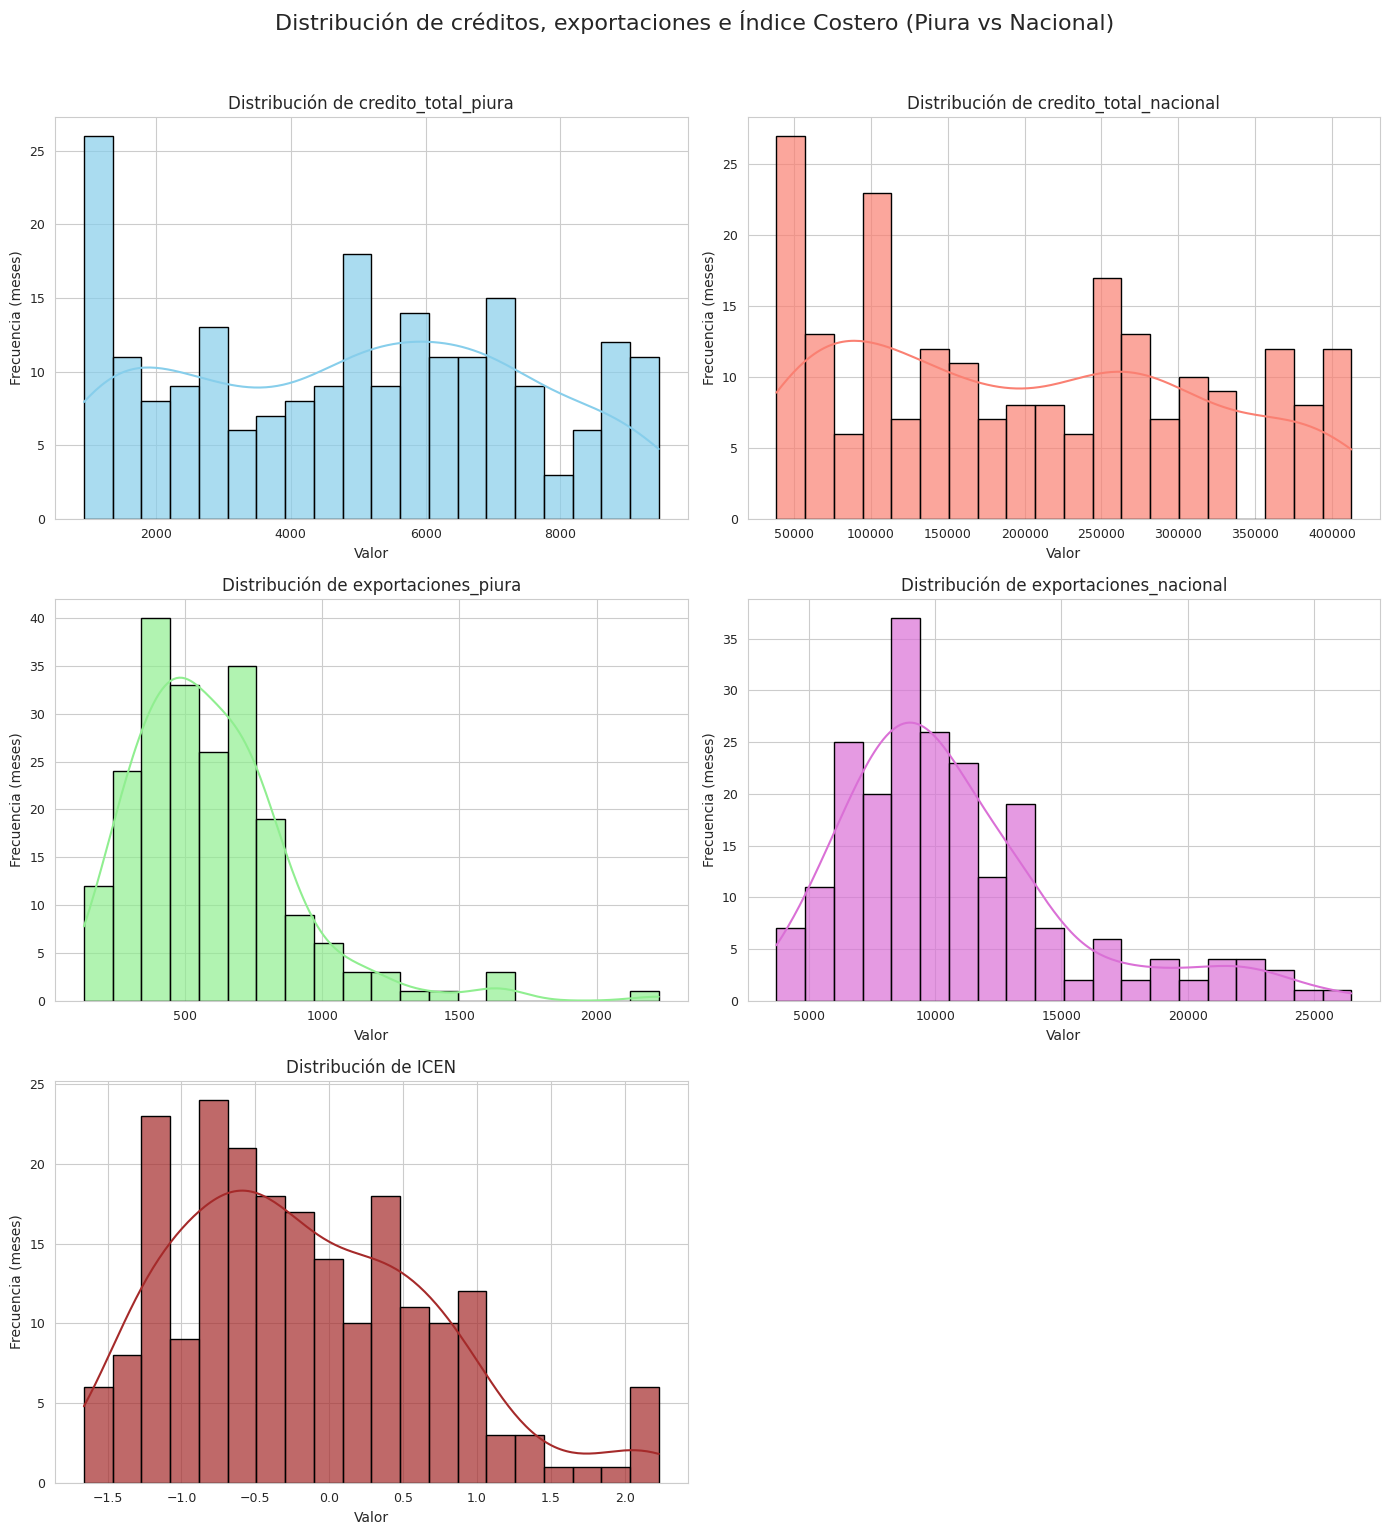

In [10]:
#=====================
#Connfiguración y estilo de gráficos
#=====================
import matplotlib.pyplot as plt #Librería base para crear gráficos
import seaborn as sns #Librería para visualización estadística

# Configuración estética
sns.set_style("whitegrid") #Fondo con cuadrícula clara para mejorar la lectura

# Lista de colores para cada serie
colores = ['skyblue', 'salmon', 'lightgreen', 'orchid', 'brown']  #Paleta de colores para cada serie, added color for new variable

# Define the list of series for the histogram, added new variable
series_hist = ["credito_total_piura", "credito_total_nacional", "exportaciones_piura", "exportaciones_nacional", "ICEN"]

#Creación de lienzo y ejes
fig, axes = plt.subplots(3, 2, figsize=(14,15))  #Crea una figura con 6 subgráficos (3x2) to accommodate the new variable
axes = axes.flatten() # Convierte la matriz de ejes en una lista lineal para iterar

#Bucle de graficación
for ax, col, color in zip(axes, series_hist, colores): #Itera sincronizando eje, nombre de columna y color
    sns.histplot(
        df_final[col].dropna(), #Serie sin valores faltantes para evitar huecos en el histograma, using df_final
        bins=20, #Número de intervalos
        kde=True, #Agrega curva de densidad para ver la forma de la distribución
        ax=ax, #Dibuja en el subgráfico asignado
        color=color, #Color del histograma
        edgecolor='black', #Borde negro para resaltar las barras
        alpha=0.7 #Transparencia de barras
    )
    ax.set_xlabel("Valor", fontsize=10) #Etiqueta del eje X
    ax.set_ylabel("Frecuencia (meses)", fontsize=10) #Etiqueta del eje Y indicando que se mide la frecuencia en meses
    ax.set_title(f"Distribución de {col}", fontsize=12) #Título individual del gráfico que indica qué variable se está mostrando
    ax.tick_params(axis='both', which='major', labelsize=9) #Ajusta el tamaño de las etiquetas de los ejes para mejorar la legibilidad

# Hide any unused subplots
for i in range(len(series_hist), len(axes)):
    fig.delaxes(axes[i])


plt.suptitle("Distribución de créditos, exportaciones e Índice Costero (Piura vs Nacional)", fontsize=16, y=1.02) #Título general de toda la figura
plt.tight_layout() #Ajusta automáticamente el espacio entre subgráficos
plt.show() #Muestra los gráficos

Interpretaciones

Al comparar las distribuciones del crédito total en Piura y a nivel nacional, se observa una similitud fundamental en su comportamiento: ambas muestran una clara tendencia hacia valores crecientes a lo largo del tiempo, reflejando la expansión general del sistema financiero peruano entre 2005 y 2022. Las respectivas distribuciones indican una concentración de datos en rangos de valores más altos, lo que confirma que el volumen de crédito se incrementó de manera sostenida. Sin embargo, la diferencia más notoria radica en la escala: mientras que el crédito en Piura se mide en miles de millones de soles, el crédito total nacional opera en cientos de miles de millones, evidenciando el peso significativamente mayor de la actividad crediticia a nivel país. A pesar de esta diferencia de magnitud, el patrón de crecimiento y la forma general de las distribuciones son consistentes, sugiriendo que el dinamismo del crédito en Piura sigue en gran medida la tendencia nacional, aunque con sus propias particularidades regionales.

El análisis de las distribuciones muestra que las exportaciones de Piura se concentran mayormente entre 300 y 700 millones, con un valor más frecuente cercano a los 500 millones. La forma de la distribución es asimétrica hacia la derecha, lo que refleja la existencia de picos poco frecuentes en torno a los 2000 millones, asociados probablemente a campañas estacionales o eventos excepcionales. Esto evidencia que las exportaciones piuranas son relativamente bajas, variables y dependientes de sectores específicos, lo que genera inestabilidad en el tiempo.

Por otro lado, las exportaciones nacionales presentan una distribución también asimétrica hacia la derecha, aunque con mayor estabilidad. La mayoría de meses se concentra entre 8000 y 12000 millones, con una moda alrededor de los 9000 millones. Aunque existen valores atípicos de hasta 25 000 millones, estos no son tan pronunciados como en el caso de Piura, lo que refleja una mayor consistencia y menor vulnerabilidad a choques puntuales. En conjunto, la comparación evidencia que Piura tiene un peso reducido en el total nacional, con exportaciones más volátiles y estacionales, mientras que el país en general muestra un patrón más regular gracias a una mayor diversificación.

La distribución del Índice Costero El Niño (ICEN) nos muestra cómo varían las temperaturas del mar en la costa peruana durante el periodo 2005-2022. Observamos que la mayoría de los valores se agrupan alrededor de cero, indicando que, gran parte del tiempo, las condiciones de temperatura fueron normales. Sin embargo, la dispersión de la distribución hacia valores positivos y negativos, es crucial. Los valores positivos altos corresponden a los eventos de El Niño costero, donde el mar está significativamente más cálido de lo usual. Los valores negativos bajos, por otro lado, representan los eventos de La Niña costera, con temperaturas más frías. Esta distribución no solo confirma la existencia de estos fenómenos, sino que también visualiza su frecuencia e intensidad en el periodo estudiado, subrayando la importancia de la variabilidad climática en la región costera del Perú.


#**Mapa de Calor de Correlaciones**

Procedimiento

Se seleccionan las variables de interés y se aseguran en formato numérico para evitar errores.

Se calcula la matriz de correlación de Pearson entre todas las variables.

Se genera un mapa de calor con valores anotados, colores que distinguen correlaciones positivas y negativas, y diseño ajustado para facilitar la lectura.

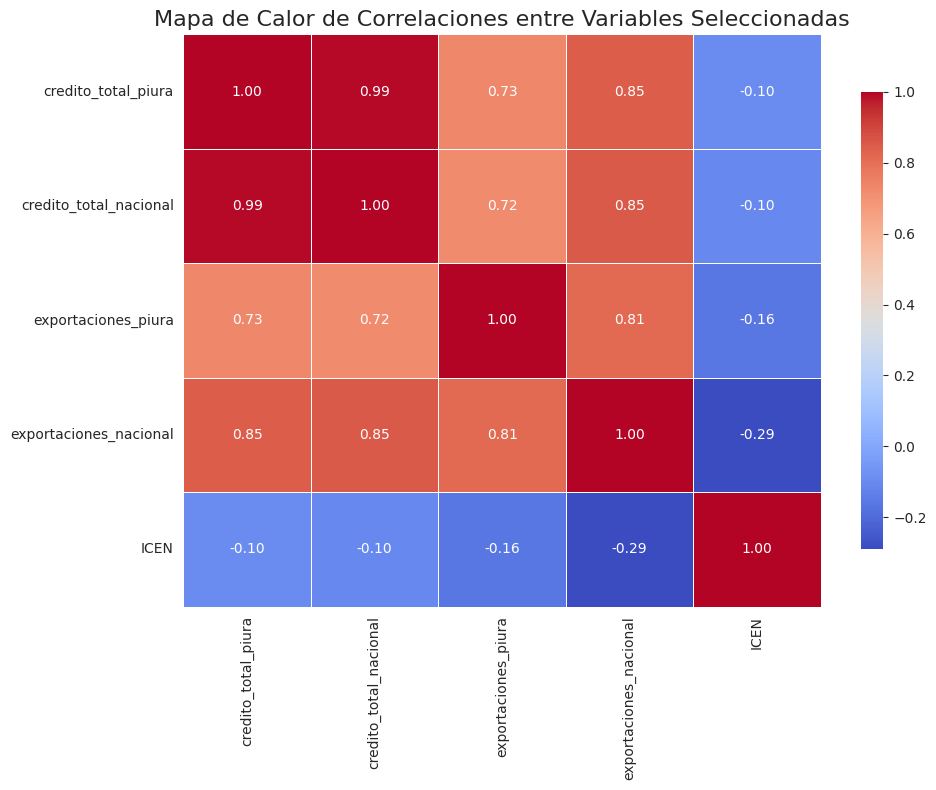

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Definir variables de interés
variables_interes = [
    "credito_total_piura",
    "credito_total_nacional",
    "exportaciones_piura",
    "exportaciones_nacional",
    "ICEN"
]

# Asegurar que las columnas existan y sean numéricas
df_corr = df_final[variables_interes].apply(pd.to_numeric, errors="coerce")

# Calcular la matriz de correlación
corr_matrix = df_corr.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))  # Tamaño del gráfico

sns.heatmap(
    corr_matrix,        # Matriz de correlaciones
    annot=True,         # Mostrar valores dentro de cada celda
    cmap='coolwarm',    # Escala de colores
    fmt=".2f",          # 2 decimales
    linewidths=".5",    # Líneas divisorias
    cbar_kws={"shrink": 0.8}  # Ajuste barra de colores
)

plt.title('Mapa de Calor de Correlaciones entre Variables Seleccionadas', fontsize=16)
plt.tight_layout()
plt.show()

Interpretaciones

El mapa de calor nos muestra qué tan relacionadas están las variables entre sí.

Créditos muy relacionados: El crédito en Piura está casi perfectamente relacionado (0.99) con el crédito a nivel nacional. Esto significa que lo que pasa con el crédito en Perú se refleja directamente en Piura.

Crédito y Exportaciones se mueven juntos, pero menos fuerte: Hay una relación positiva (entre 0.72 y 0.85) entre el crédito y las exportaciones, tanto a nivel Piura como nacional. Cuando hay más crédito, las exportaciones tienden a ser mayores, y viceversa, pero la relación no es tan fuerte como entre los propios créditos.

Exportaciones Piura y Nacionales relacionadas: Las exportaciones de Piura tienen una relación positiva fuerte (0.81) con las exportaciones de todo Perú. Las tendencias generales del comercio exterior peruano influyen en Piura.

ICEN afecta negativamente, pero poco: El Índice Costero El Niño (ICEN) tiene una relación negativa (entre -0.10 y -0.29) con las otras variables, especialmente con las exportaciones nacionales (-0.29) y las de Piura (-0.16). Esto sugiere que cuando hay eventos de El Niño (ICEN positivo), las exportaciones tienden a disminuir, pero la relación no es muy fuerte. Su impacto en el crédito es casi nulo.

En resumen, el crédito sigue la tendencia nacional de cerca. Las exportaciones están relacionadas positivamente con el crédito y entre sí, pero muestran mayor independencia. El clima (ICEN) parece tener un impacto negativo leve en las exportaciones, más que en el crédito.

**Series de tiempo**

Procedimiento

Se grafican las series de crédito y de exportaciones, comparando Piura frente al total nacional.

Se añaden títulos, etiquetas y leyendas para facilitar la interpretación.

Se muestran los gráficos finales como series de tiempo para analizar su evolución.

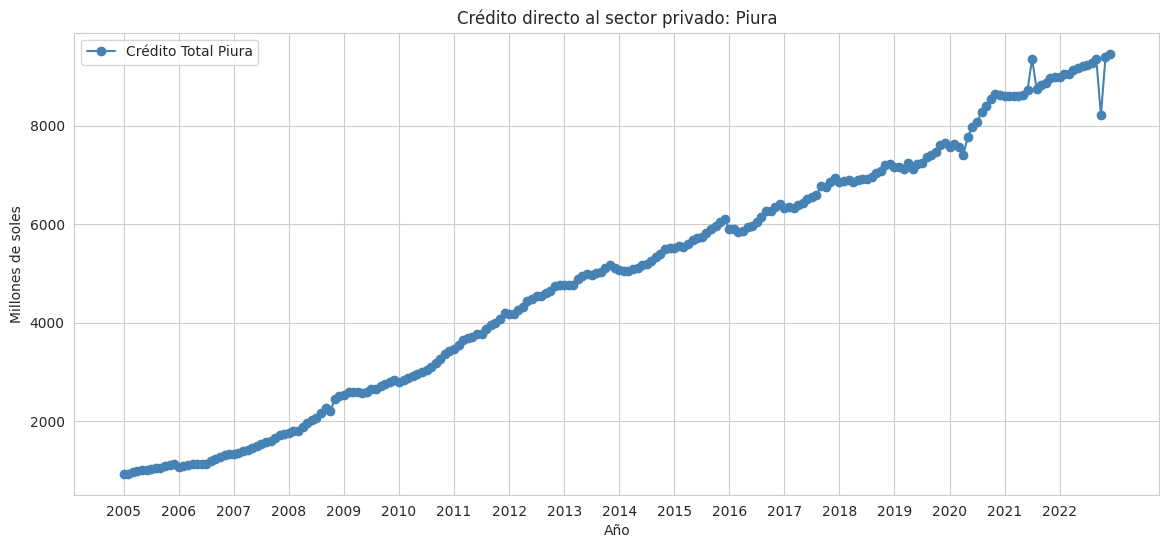

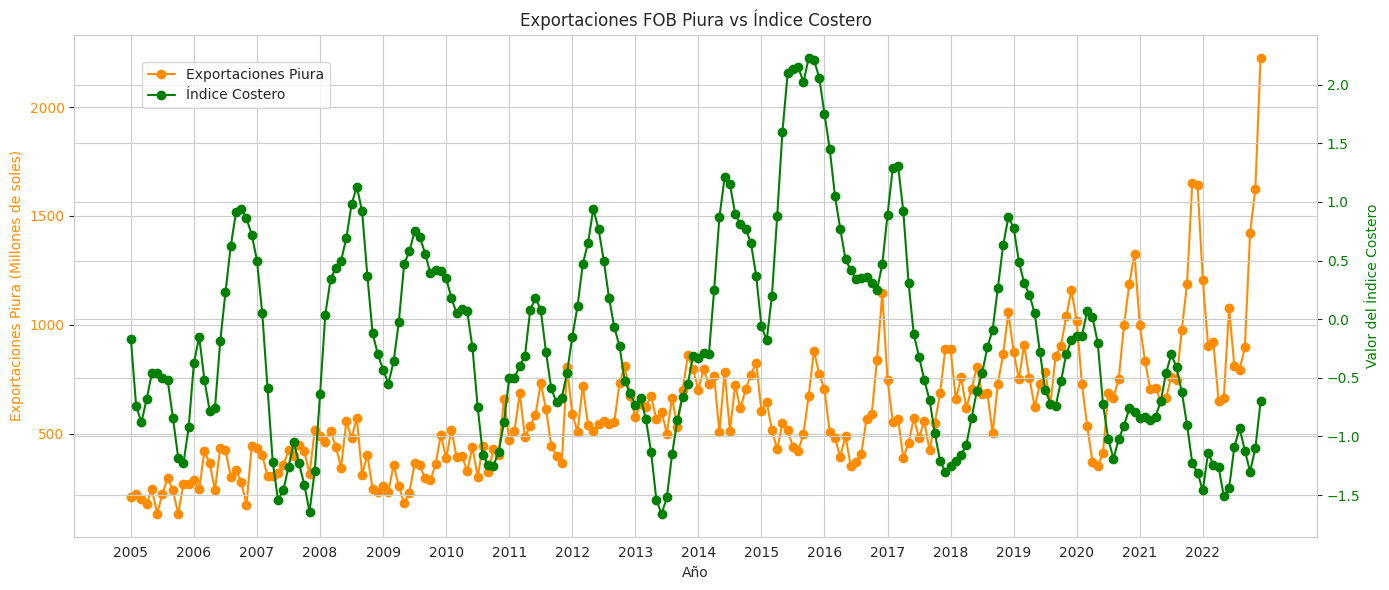

In [12]:
# 🔹 Serie de tiempo: Crédito Total Piura
plt.figure(figsize=(14,6))
df_final["credito_total_piura"].plot(label="Crédito Total Piura", marker='o', color="steelblue")
plt.title("Crédito directo al sector privado: Piura")
plt.xlabel("Año")
plt.ylabel("Millones de soles")
plt.xticks(df_final.index[::12], df_final['fecha'].dt.year[::12]) # Set x-ticks to show years
plt.legend()
plt.show()


# 🔹 Serie de tiempo: Exportaciones Piura vs Indice Costero
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Exportaciones Piura on the primary y-axis
ax1.plot(df_final.index, df_final["exportaciones_piura"], label="Exportaciones Piura", marker='o', color="darkorange")
ax1.set_xlabel("Año")
ax1.set_ylabel("Exportaciones Piura (Millones de soles)", color="darkorange")
ax1.tick_params(axis='y', labelcolor="darkorange")
ax1.set_xticks(df_final.index[::12]) # Set x-ticks to show years
ax1.set_xticklabels(df_final['fecha'].dt.year[::12]) # Set x-ticks labels to years

# Create a secondary y-axis for ICEN
ax2 = ax1.twinx()
ax2.plot(df_final.index, df_final["ICEN"], label="Índice Costero", marker='o', color="green")
ax2.set_ylabel("Valor del Índice Costero", color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Title and legend
plt.title("Exportaciones FOB Piura vs Índice Costero")
fig.tight_layout() # Adjust layout
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9)) # Add legend
plt.show()

Interpretaciones

Gráfico 1

El gráfico de serie de tiempo del crédito total al sector privado en Piura muestra una tendencia principal marcadamente ascendente a lo largo del periodo 2005-2022, lo que evidencia un crecimiento sostenido del financiamiento en la región. Esta trayectoria general refleja la expansión económica de Piura y el desarrollo del sistema financiero. Sin embargo, la serie no es una línea recta perfecta, presentando desviaciones puntuales que corresponden a la influencia de factores externos y coyunturales.

Una desviación notable ocurre alrededor de 2020. En este año, con el inicio de la pandemia de COVID-19, se observa una clara desaceleración o estancamiento temporal en la curva de crecimiento del crédito. La incertidumbre económica global, las restricciones a la actividad empresarial y la cautela tanto de prestamistas como de prestatarios llevaron a una reducción en la demanda y oferta de crédito tradicional. Si bien programas de estímulo como Reactiva Perú mitigaron el impacto en la liquidez empresarial, la tendencia natural de crecimiento se vio interrumpida por la magnitud del shock pandémico.

Posteriormente, a partir de finales de 2020 y en los años 2021 y 2022, la serie retoma su ascenso. Este reinicio del crecimiento del crédito refleja la fase de recuperación económica post-pandemia. A medida que las actividades se normalizaron y la confianza regresó gradualmente, las empresas y los individuos volvieron a demandar financiamiento para inversión y consumo. Sin embargo, la trayectoria en 2022 podría presentar una pendiente ligeramente distinta a la de los años pre-pandemia, posiblemente influenciada por nuevos factores macroeconómicos como presiones inflacionarias o ajustes en la política monetaria.

Mientras la tendencia de largo plazo del crédito en Piura es de expansión, los eventos de 2020 y 2022 ilustran cómo shocks externos significativos (pandemia) pueden generar desviaciones temporales de esa tendencia, desacelerando el crecimiento del crédito antes de que factores de recuperación impulsen nuevamente su ascenso. Esto subraya la resiliencia del sistema financiero pero también su sensibilidad a crisis mayores.

Gráfico 2

El gráfico de serie de tiempo que compara las Exportaciones FOB de Piura y el Índice Costero El Niño (ICEN) revela una relación visual intrigante y fundamental para entender la economía regional. La serie de las Exportaciones Piura (línea naranja) muestra una alta volatilidad, con subidas y caídas pronunciadas a lo largo del tiempo, sin una tendencia lineal clara y sostenida como la del crédito. Esta volatilidad es un rasgo distintivo del sector exportador de Piura, fuertemente influenciado por la producción agrícola (mango, uva, banano, arándanos) y pesquera, que son sensibles a factores externos.

Por otro lado, la serie del Índice Costero  muestra las fluctuaciones de la temperatura superficial del mar en la costa. Esta serie oscila alrededor de cero, con picos positivos que indican eventos de El Niño costero . La comparación visual entre ambas series es clave: a menudo, los picos positivos del ICEN (eventos de El Niño) parecen coincidir con caídas o desaceleraciones en las Exportaciones de Piura. El ejemplo más notorio es el año 2017, cuando un fuerte evento de El Niño costero generó un pico significativo en el ICEN y, simultáneamente, se observa una caída marcada en las exportaciones de Piura, probablemente debido a los daños en cultivos y la afectación de la actividad pesquera.



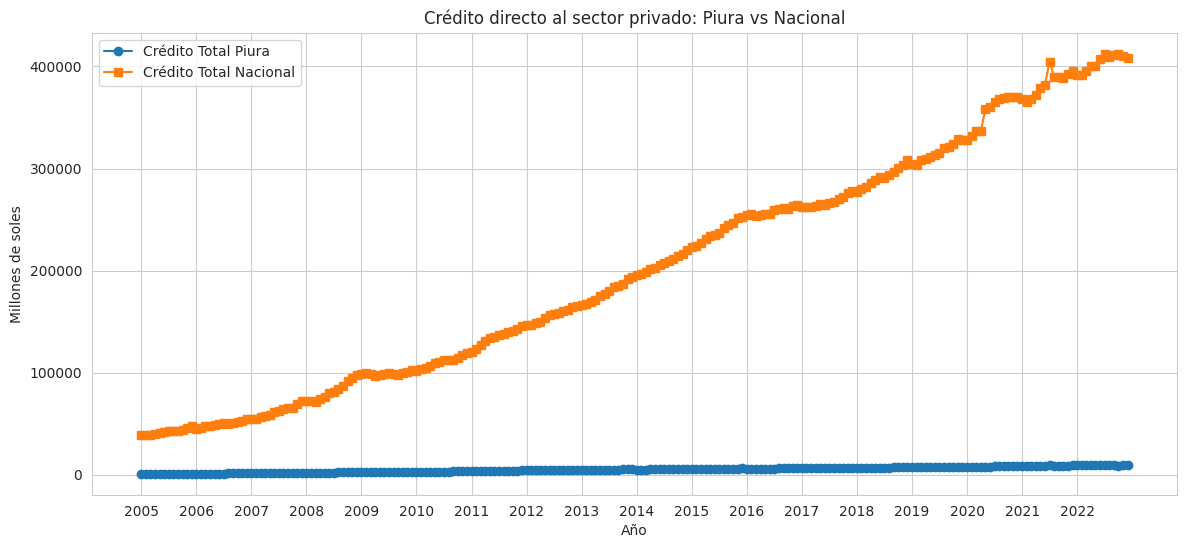

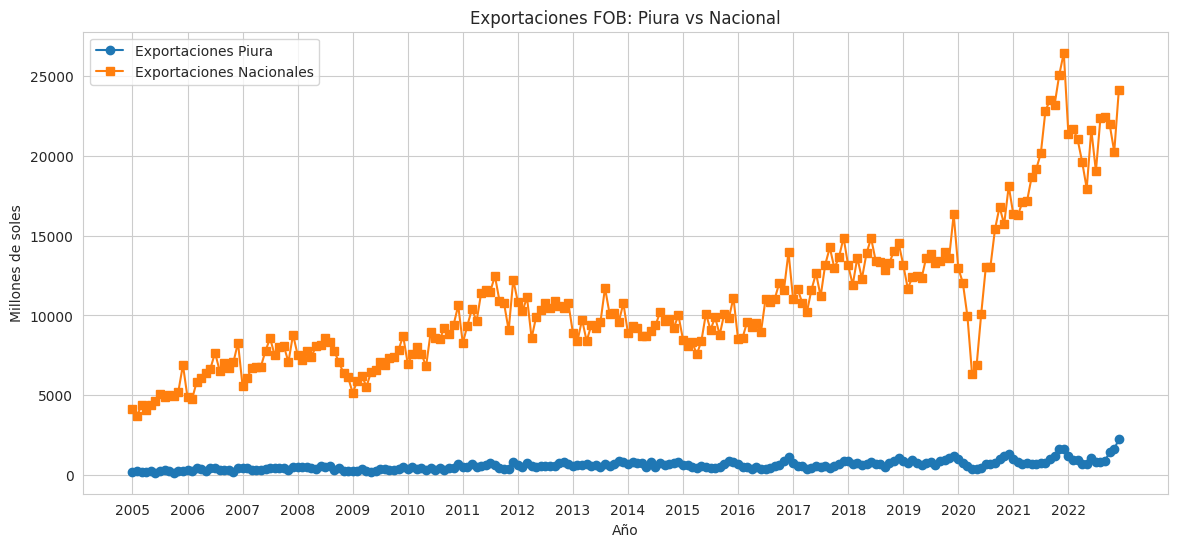

In [13]:
#Series de tiempo en bruto (Piura vs Nacional)

# Comparación crédito Piura vs crédito total nacional
plt.figure(figsize=(14,6)) #Crea nuevo lienzo
df_final["credito_total_piura"].plot(label="Crédito Total Piura", marker='o') #Dibuja la serie temporal de crédito total de Piura
df_final["credito_total_nacional"].plot(label="Crédito Total Nacional", marker='s') #Superpone la serie de crédito total nacional en la misma figura
plt.title("Crédito directo al sector privado: Piura vs Nacional") #Define el título del gráfico
plt.xlabel("Año") #Etiqueta el eje X indicando que representa el tiempo (frecuencia mensual)
plt.ylabel("Millones de soles") #Etiqueta el eje Y indicando la unidad monetaria de ambas series (S/ millones).
plt.xticks(df_final.index[::12], df_final['fecha'].dt.year[::12]) # Set x-ticks to show years
plt.legend() #Muestra la leyenda
plt.show() #Renderiza en pantalla el primer gráfico y limpia la figura activa.


# Comparación exportaciones Piura vs exportaciones nacionales
plt.figure(figsize=(14,6)) #Crea una nueva figura independiente
df_final["exportaciones_piura"].plot(label="Exportaciones Piura", marker='o') #Dibuja la serie temporal de exportaciones de Piura (millones de US$)
df_final["exportaciones_nacional"].plot(label="Exportaciones Nacionales", marker='s') #Superpone la serie de exportaciones totales nacionales (millones de US$)
plt.title("Exportaciones FOB: Piura vs Nacional") # Título del gráfico
plt.xlabel("Año") #Etiqueta del eje X (tiempo mensual)
plt.ylabel("Millones de soles") #Etiqueta del eje Y
plt.xticks(df_final.index[::12], df_final['fecha'].dt.year[::12]) # Set x-ticks to show years
plt.legend() #Activa la leyenda para diferenciar las líneas
plt.show() #Renderiza en pantalla el segundo gráfico y finaliza la figura

Interpretaciones

El primer gráfico revela dos aspectos clave: una tendencia de crecimiento compartida y una marcada diferencia de escala. Ambas series muestran una trayectoria consistentemente ascendente desde 2005 hasta 2022, lo que refleja la expansión general del sistema financiero peruano y el incremento en el acceso y la demanda de crédito por parte de empresas y familias en el país. Este crecimiento sostenido a nivel nacional es un indicador de estabilidad macroeconómica y desarrollo del sector bancario.

Mientras que la serie de Piura se mueve en el rango de miles de millones de soles, la serie nacional alcanza cientos de miles de millones. Esto evidencia el peso significativamente mayor de la actividad crediticia en el conjunto del país en comparación con una sola región. Sin embargo, la similitud en la forma de las curvas sugiere que el crecimiento del crédito en Piura sigue en gran medida la tendencia agregada nacional. Los factores que impulsan el crédito a nivel país (como la estabilidad económica, la política monetaria, la regulación financiera y la demanda de inversión empresarial) también influyen en Piura. Por otro lado las crisis económicas globales (como la de 2008-2009) o eventos internos mayores (como la pandemia de COVID-19 en 2020) se reflejan en una ralentización del crecimiento del crédito tanto a nivel nacional como en Piura. Esto subraya la interconexión del sistema financiero regional con el nacional y global.

La comparación visual refuerza la idea de que el sector financiero en Piura es parte integral del sistema nacional y responde a las mismas fuerzas impulsoras y shocks.

El segundo gráfico a diferencia de las tendencias ascendentes relativamente suaves del crédito, ambas series de exportaciones muestran subidas y caídas frecuentes y marcadas a lo largo del periodo 2005-2022.

La serie de Exportaciones Nacionales (línea naranja) refleja el desempeño del sector exportador del Perú en su conjunto. Se observan picos pronunciados que a menudo coinciden con periodos de altos precios de las materias primas a nivel global, como el superciclo de commodities que benefició al Perú, especialmente entre 2009 y 2012. Asimismo, se aprecian caídas significativas relacionadas con el fin de estos ciclos (como 2014-2015) o con shocks globales como la pandemia de COVID-19 en 2020. A pesar de esta volatilidad, la mayor diversificación de la canasta exportadora peruana (minerales, productos agrícolas variados, pesqueros, textiles, etc.) le otorga cierta base que se refleja en la escala mucho mayor de la serie nacional comparada con la de Piura.

La serie de Exportaciones Piura (línea azul) muestra un comportamiento aún más volátil en relación con su escala. Las fluctuaciones son más acentuadas, con picos y valles pronunciados. Esto se debe a la alta concentración y sensibilidad de las exportaciones de Piura en productos agrícolas (mango, uva, banano, arándanos) y pesqueros. Estos productos son particularmente vulnerables a factores climáticos (como los fenómenos de El Niño y La Niña) y a las condiciones específicas de la demanda en mercados internacionales para esos bienes. Un ejemplo claro de esta vulnerabilidad es la caída marcada en 2017, coincidiendo con un fuerte evento de El Niño costero que afectó la producción agrícola y pesquera regional.

**Series de tiempo**

Procedimiento

Se calculan los porcentajes de participación de Piura en el crédito y en las exportaciones nacionales.

Se grafican ambas participaciones en series de tiempo con títulos y ejes claros.

Se muestran los gráficos finales para analizar la evolución de la importancia relativa de Piura en el ámbito nacional.

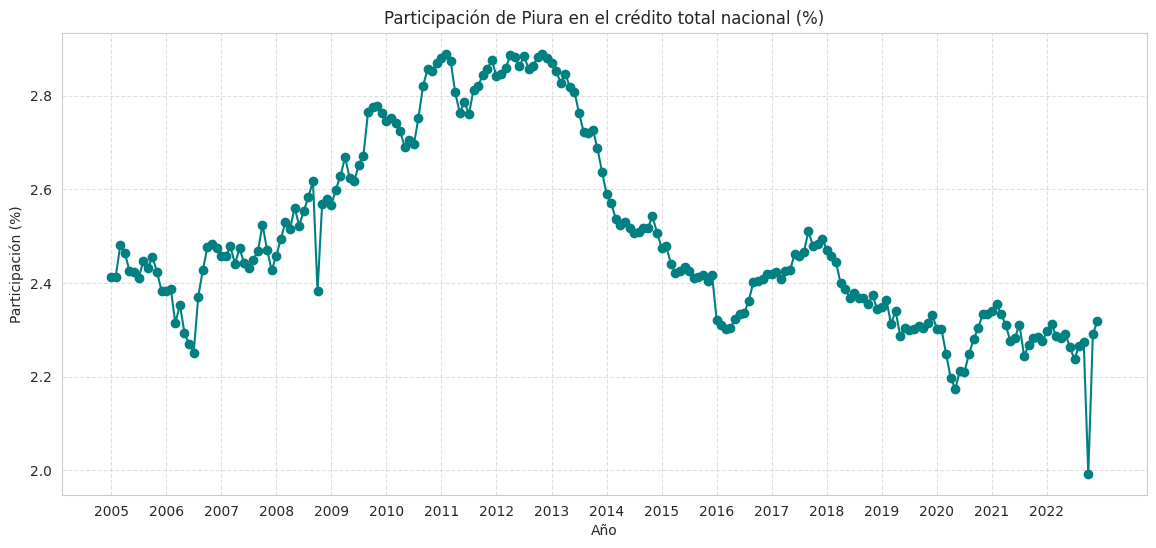

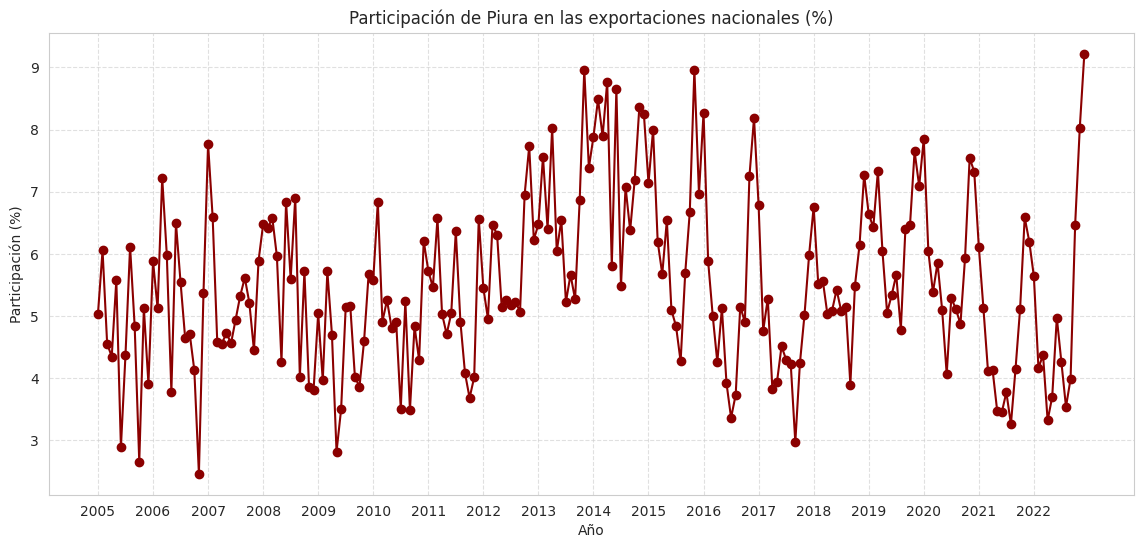

In [14]:
#Participación de Piura en el total nacional

# Calcula la participación de crédito: divide el crédito de Piura entre el crédito total nacional, y lo multiplica por 100 para expresarlo como porcentaje.
df_final["participacion_credito"] = (
    df_final["credito_total_piura"] / df_final["credito_total_nacional"] * 100
)
#Calcula la participacion exportaciones: divide las exportaciones de Piura entre las exportaciones nacionales, y lo multiplica por 100 para obtener el porcentaje de participación.
df_final["participacion_exportaciones"] = (
    df_final["exportaciones_piura"] / df_final["exportaciones_nacional"] * 100
)

#Gráfico de participación en crédito
plt.figure(figsize=(14,6)) #Crea una nueva figura
df_final["participacion_credito"].plot(marker='o', color="teal") #Grafica la serie temporal de participación del crédito de Piura en porcentaje
plt.title("Participación de Piura en el crédito total nacional (%)") #Establece el título del gráfico.
plt.xlabel("Año") #Etiqueta el eje X
plt.ylabel("Participación (%)") #Etiqueta del eje Y
plt.xticks(df_final.index[::12], df_final['fecha'].dt.year[::12]) # Set x-ticks to show years
plt.grid(True, linestyle="--", alpha=0.6) #Activa la cuadrícula en el gráfico
plt.show() #Muestra en pantalla el gráfico generado.


#Gráfico de participación en exportaciones
plt.figure(figsize=(14,6)) #Crea una nueva figura
df_final["participacion_exportaciones"].plot(marker='o', color="darkred") #Grafica la serie temporal de participación de las exportaciones de Piura en porcentaje
plt.title("Participación de Piura en las exportaciones nacionales (%)") #Establece el título del gráfico
plt.xlabel("Año") #Etiqueta del eje X
plt.ylabel("Participación (%)") #Etiqueta del eje Y
plt.xticks(df_final.index[::12], df_final['fecha'].dt.year[::12]) # Set x-ticks to show years
plt.grid(True, linestyle="--", alpha=0.6) #Activa la cuadrícula
plt.show() #Renderiza en pantalla el gráfico

Interpretación

El primer gráfico muestra la participación porcentual de Piura en el crédito total nacional ofrece una perspectiva interesante sobre la importancia relativa de la región en el sistema financiero peruano a lo largo del tiempo. A diferencia de las series de crédito bruto que siempre crecen, esta serie revela las dinámicas de crecimiento comparado entre Piura y el resto del país.

Se observa que la participación de Piura fluctúa en un rango relativamente estrecho, principalmente entre el 2% y el 3% del crédito nacional total durante el periodo 2005-2022. La línea muestra un ascenso inicial desde alrededor del 2.4% en 2005 hasta alcanzar un pico cercano al 2.9% en 2012-2013. Este aumento inicial sugiere que el crédito en Piura creció a un ritmo ligeramente mayor que el promedio nacional en esos años, posiblemente impulsado por el auge de sectores regionales clave como la agroindustria y la construcción en un contexto de alto crecimiento económico en el Perú.

Posteriormente, a partir de 2013, la participación muestra una tendencia descendente más pronunciada, cayendo hacia niveles cercanos al 2.5% e incluso por debajo en algunos momentos. Esta caída no necesariamente significa que el crédito en Piura disminuyó en términos absolutos (el otro gráfico indica que siguió creciendo), sino que el crédito en el resto del país creció a un ritmo más rápido que en Piura durante esos años. Varios factores podrían explicar esto: un dinamismo crediticio mayor en otras regiones, proyectos de inversión de gran envergadura en otras partes del país que demandaron mucho financiamiento, o una desaceleración relativa en el ritmo de crecimiento de Piura.

En los últimos años del periodo (2018-2022), la participación parece estabilizarse en un rango inferior, fluctuando alrededor del 2.3%. Las caídas más notables en esta fase pueden estar relacionadas con shocks específicos que afectaron a Piura más que al promedio nacional o con la dinámica diferencial de la recuperación post-pandemia del crédito en distintas regiones.

En el segundo gráfico muestra la participación porcentual de Piura en las exportaciones nacionales revela un comportamiento altamente volátil y fluctuante entre 2005 y 2022, oscilando ampliamente entre aproximadamente el 2.5% y el 9% sin una tendencia clara a largo plazo. La extrema variabilidad, con picos y valles pronunciados, es la característica dominante de esta serie. Esta volatilidad se explica principalmente por la estructura de la canasta exportadora de Piura, concentrada en productos agrícolas y pesqueros, que son intrínsecamente sensibles a factores climáticos como El Niño (causando caídas marcadas en años como 2017) y a la estacionalidad de las cosechas. Adicionalmente, la participación regional se ve afectada por los precios internacionales de sus productos clave y por el desempeño del sector exportador en el resto del país (especialmente las exportaciones de minerales, que tienen un gran peso nacional). Los picos más altos en la participación de Piura coinciden probablemente con momentos de auge productivo o precios favorables, mientras que las caídas reflejan el impacto de los factores mencionados, subrayando la vulnerabilidad de la contribución exportadora de Piura a shocks externos y locales, lo que la hace mucho más errática que su participación en el crédito nacional

**Gráfico Boxplots**

Procedimiento

Se definen las variables económicas a analizar.

Se asignan colores para diferenciarlas.

Se generan boxplots individuales para cada variable.

Se muestran los gráficos finales para interpretar la distribución de los datos.

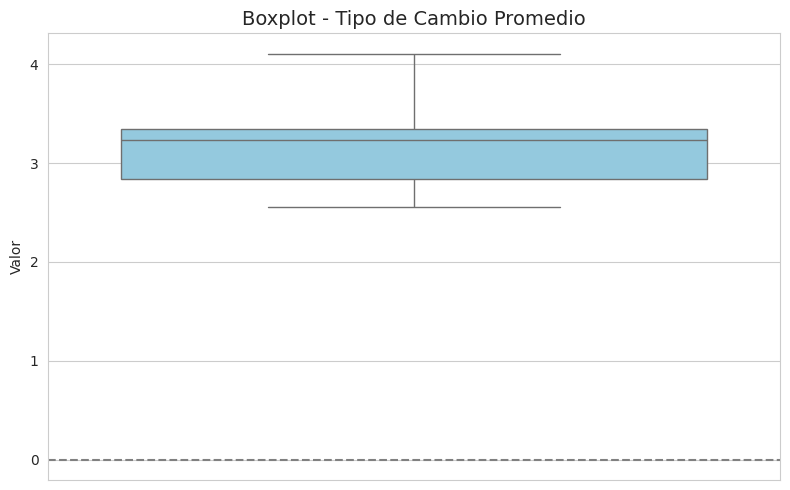

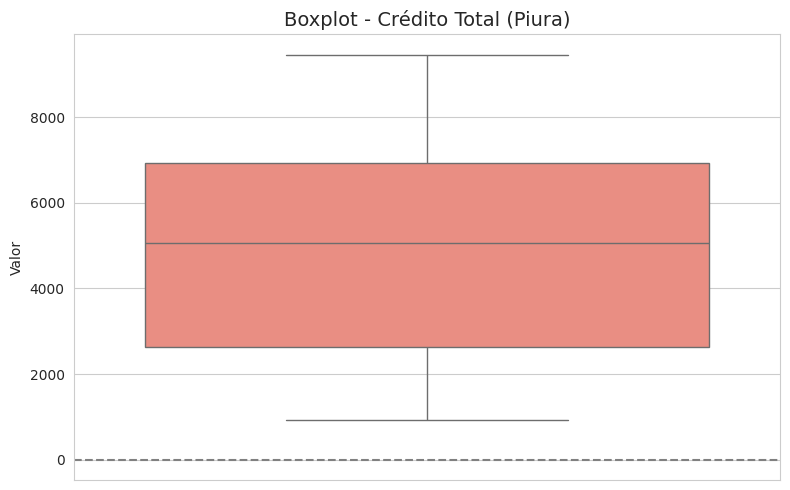

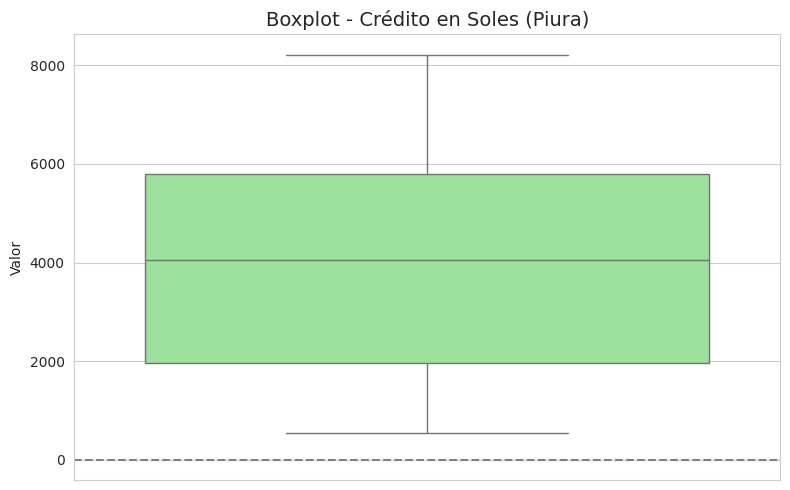

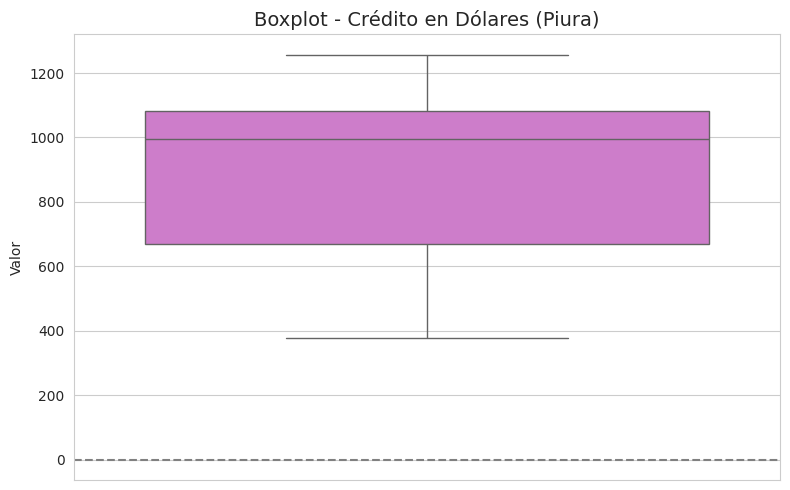

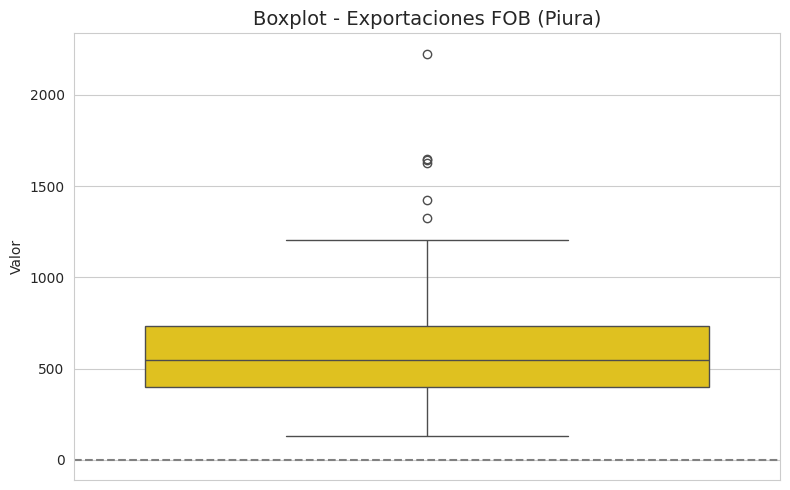

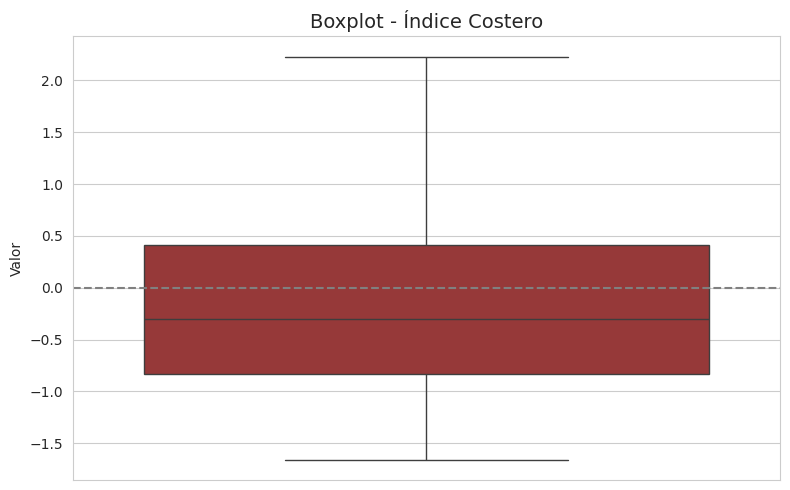

In [15]:
import matplotlib.pyplot as plt #Importa Matplotlib para crear y mostrar gráficos
import seaborn as sns #Importa Seaborn para visualizaciones estadísticas (boxplots, estilos)
import pandas as pd #Importa pandas para manejar series/estructuras de datos

# Diccionario con las variables: 'variables' agrupa todas las series en un diccionario para iterarlas de forma uniforme al graficar.
variables = {
    "Tipo de Cambio Promedio": df_final['tipo_cambio'], # Using df_final
    "Crédito Total (Piura)": df_final['credito_total_piura'], # Using df_final
    "Crédito en Soles (Piura)": df_final['credito_soles_piura'], # Using df_final
    "Crédito en Dólares (Piura)": df_final['credito_dolares_piura'], # Using df_final
    "Exportaciones FOB (Piura)": df_final['exportaciones_piura'], # Using df_final
    "Índice Costero": df_final['ICEN'] # Added the new variable
}

# Lista de colores para cada gráfico
colores = ['skyblue', 'salmon', 'lightgreen', 'orchid', 'gold', 'brown'] #Define una paleta fija (uno por cada variable), added color

# Recorremos cada variable para graficar su boxplot con color distinto
for (nombre, valores), color in zip(variables.items(), colores):
# zip empareja cada par (nombre, valores) del diccionario con un color de la lista. 'nombre' es el título legible; 'valores' es la serie numérica a graficar.
    plt.figure(figsize=(8,5)) #Crea una nueva figura
    sns.boxplot(y=pd.Series(valores), color=color)  #Dibuja el boxplot vertical usando la serie; aplica el color asignado.
    plt.title(f"Boxplot - {nombre}", fontsize=14) #Título del gráfico incluyendo el nombre de la variable
    plt.ylabel("Valor") #Etiqueta del eje Y
    plt.axhline(0, color='grey', linestyle='--')  #Línea de referencia en cero
    plt.tight_layout() #Ajusta márgenes para evitar solapes de textos/elementos
    plt.show() #Muestra en pantalla el boxplot y cierra la figura actual

Interpretaciones

El boxplot del Tipo de Cambio Promedio se ve muy compacto. La caja central, donde está la mitad de todos los datos (del 25% al 75%), es muy pequeña, y la línea de la mitad (la mediana) está justo al centro. Esto quiere decir que el tipo de cambio se mantuvo muy estable la mayor parte del tiempo, con poca variación. Las líneas que salen de la caja nos muestran el rango normal de valores, y como no hay puntos sueltos lejos de ellas, no hubo cambios de tipo de cambio extremadamente raros.

En los boxplots del Crédito Total (Piura), Crédito en Soles (Piura) y Crédito en Dólares (Piura), la caja central y las líneas que salen hacia arriba son más largas. La línea de la mitad (mediana) está en la parte de arriba de la caja. Esto significa que los valores de crédito crecieron mucho durante los años analizados. La mayoría de los datos se encuentran en valores más altos, mostrando que el crédito fue aumentando. No hay puntos sueltos abajo, lo que indica que no hubo caídas inusuales.

Las Exportaciones FOB (Piura) son diferentes porque muestran mucha variación y puntos atípicos. La caja central puede ser más pequeña, pero hay varios puntos sueltos por encima de las líneas que salen de la caja. Estos puntos son valores atípicos y representan meses en que las exportaciones fueron excepcionalmente altas, mucho más de lo normal. Esto muestra que las exportaciones de Piura tienen momentos de auge muy marcados, pero también pueden tener mucha variación.

El boxplot del Índice Costero (ICEN) es interesante por sus puntos atípicos arriba y abajo. La caja central está cerca de cero (condiciones normales del mar), pero hay puntos sueltos tanto por encima como por debajo de las líneas que salen de la caja. Los puntos de arriba (positivos) son los eventos de El Niño, cuando el mar está muy caliente. Los puntos de abajo (negativos) son los eventos de La Niña, cuando el mar está muy frío. Estos puntos atípicos nos muestran cuándo ocurrieron y qué tan intensos fueron estos fenómenos climáticos extremos.

En resumen, los boxplots nos ayudan a ver rápidamente la estabilidad (tipo de cambio), el crecimiento continuo (créditos) y las variables con mucha variación y eventos extremos (exportaciones de Piura y ICEN)